# Use Markov Chain Monte Carlo to sample configurations of a 2D Ising system

In [1]:
%matplotlib inline

from IsingMonteCarlo import IsingMonteCarlo
import matplotlib

matplotlib.rcParams.update({'font.size': 22})

In [2]:
ising = IsingMonteCarlo(5)

In [3]:
ising.Tc

2.2691853142130221

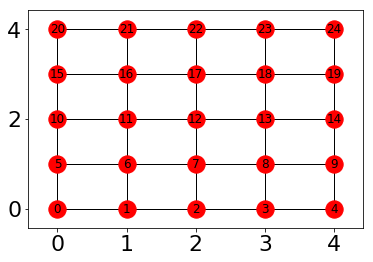

In [4]:
ising.draw_graph()

Temperatures: 100%|██████████| 20/20 [00:03<00:00,  5.39it/s]


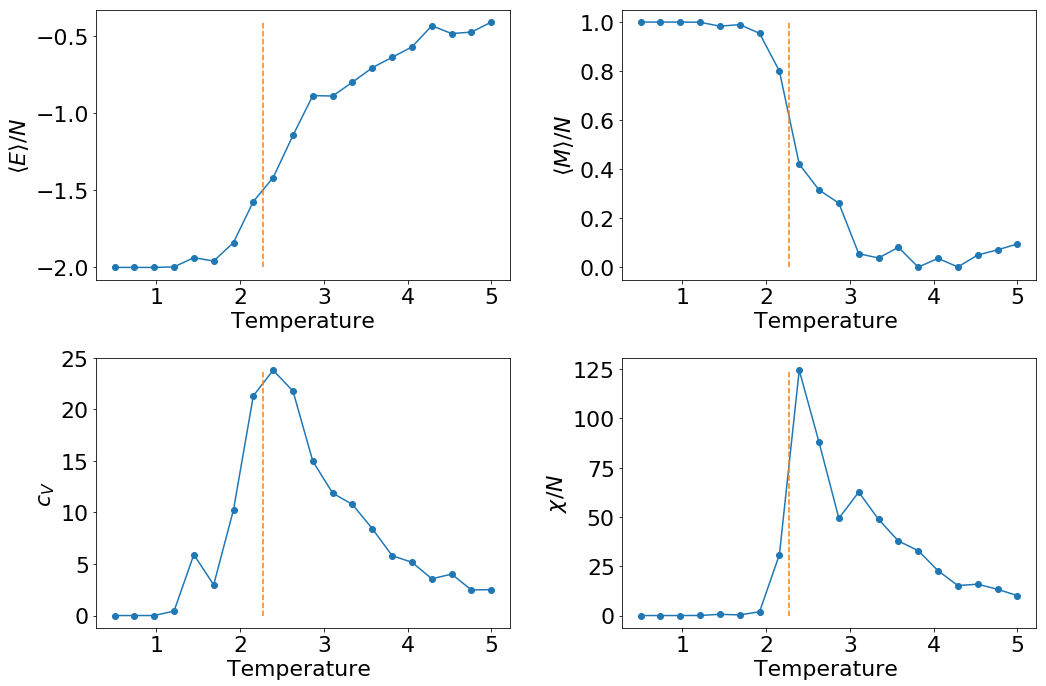

In [6]:
_ = ising.runMonteCarlo(equilibration_steps=1000, save_to_file=True)

100%|██████████| 1000000/1000000 [01:02<00:00, 15885.17it/s]


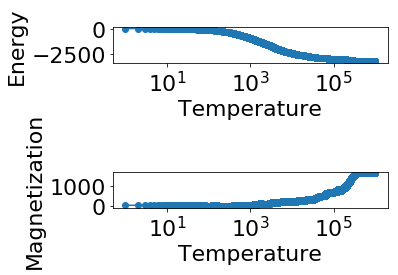

In [7]:
ising = IsingMonteCarlo(40)
_ = ising.calibrateMonteCarlo()

Temperatures: 100%|██████████| 20/20 [04:45<00:00, 14.42s/it]


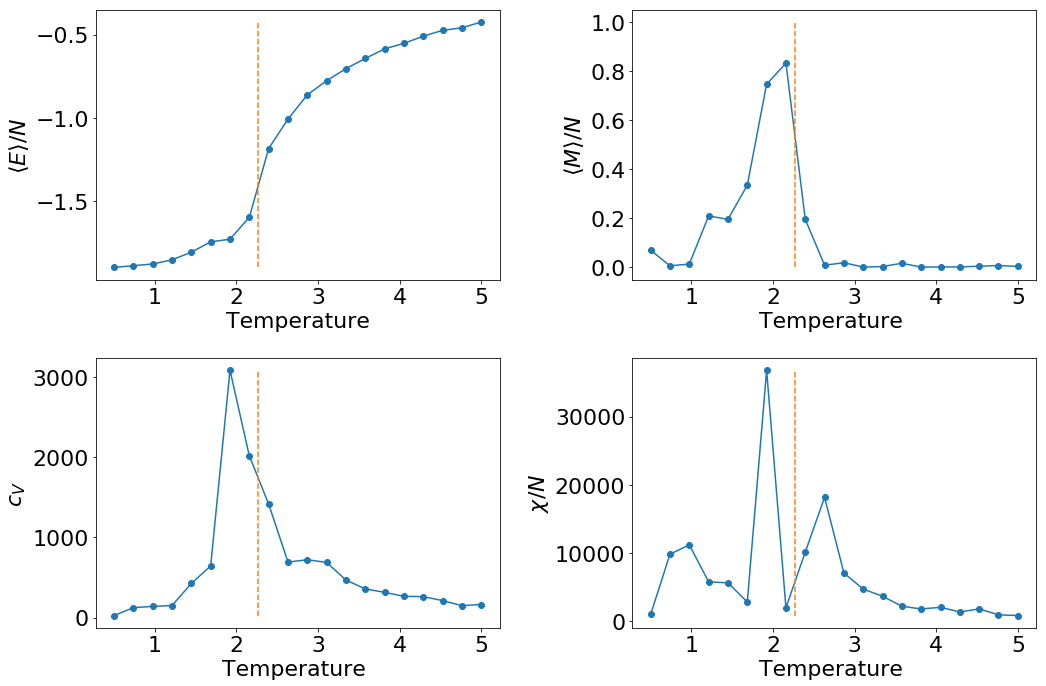

In [3]:
_ = ising.runMonteCarlo(save_to_file=True)

# NeuralNet to classify states

In [6]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [4]:
class Net(nn.Module):
    
    def __init__(self, n_spins=16, n_hidden=2, n_out=2):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(n_spins, n_hidden)
        self.fc2 = nn.Linear(n_hidden, n_out)
        
    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        return x
        
net = Net()

In [5]:
net

Net (
  (fc1): Linear (16 -> 2)
  (fc2): Linear (2 -> 2)
)

In [7]:
loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)